In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv(r"C:\Users\haree\OneDrive\Desktop\blogs.csv")

# Display basic information about the dataset
print(df.info())

# Display the first few rows of the dataset
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Data    2000 non-null   object
 1   Labels  2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB
None
                                                Data       Labels
0  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  alt.atheism
1  Newsgroups: alt.atheism\nPath: cantaloupe.srv....  alt.atheism
2  Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...  alt.atheism
3  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  alt.atheism
4  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...  alt.atheism


In [2]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

# Define a function to clean the text
def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    return text

# Apply the cleaning function to the 'Data' column
df['cleaned_text'] = df['Data'].apply(clean_text)

# Tokenization and removing stopwords
stop_words = set(stopwords.words('english'))

# Define a function to tokenize and remove stopwords
def tokenize_and_remove_stopwords(text):
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]
    return tokens

# Apply the tokenization function
df['tokens'] = df['cleaned_text'].apply(tokenize_and_remove_stopwords)

# Display the cleaned text and tokens
print(df[['cleaned_text', 'tokens']].head())

                                        cleaned_text  \
0  path cantaloupesrvcscmuedumagnesiumclubcccmued...   
1  newsgroups altatheism\npath cantaloupesrvcscmu...   
2  path cantaloupesrvcscmuedudasnewsharvardedunoc...   
3  path cantaloupesrvcscmuedumagnesiumclubcccmued...   
4  xref cantaloupesrvcscmuedu altatheism talkreli...   

                                              tokens  
0  [path, cantaloupesrvcscmuedumagnesiumclubcccmu...  
1  [newsgroups, altatheism, path, cantaloupesrvcs...  
2  [path, cantaloupesrvcscmuedudasnewsharvardedun...  
3  [path, cantaloupesrvcscmuedumagnesiumclubcccmu...  
4  [xref, cantaloupesrvcscmuedu, altatheism, talk...  


In [3]:
# Initialize the TF-IDF vectorizer
vectorizer = TfidfVectorizer()

# Fit and transform the cleaned text data
X = vectorizer.fit_transform(df['cleaned_text'])

# Display the shape of the TF-IDF matrix
print(X.shape)

(2000, 46428)


In [4]:
# Initialize the label encoder
label_encoder = LabelEncoder()

# Encode the target variable
y = label_encoder.fit_transform(df['Labels'])

# Display the encoded categories
print(label_encoder.classes_)

['alt.atheism' 'comp.graphics' 'comp.os.ms-windows.misc'
 'comp.sys.ibm.pc.hardware' 'comp.sys.mac.hardware' 'comp.windows.x'
 'misc.forsale' 'rec.autos' 'rec.motorcycles' 'rec.sport.baseball'
 'rec.sport.hockey' 'sci.crypt' 'sci.electronics' 'sci.med' 'sci.space'
 'soc.religion.christian' 'talk.politics.guns' 'talk.politics.mideast'
 'talk.politics.misc' 'talk.religion.misc']


In [5]:
from sklearn.model_selection import train_test_split

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shape of the training and test sets
print(f"Training set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")

Training set size: (1600, 46428)
Test set size: (400, 46428)


In [6]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

# Initialize the Naive Bayes classifier
nb_classifier = MultinomialNB()

# Train the model on the training set
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Display classification report
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

Accuracy: 0.7475
                          precision    recall  f1-score   support

             alt.atheism       0.55      0.94      0.69        18
           comp.graphics       0.82      0.78      0.80        18
 comp.os.ms-windows.misc       1.00      0.82      0.90        22
comp.sys.ibm.pc.hardware       0.89      0.64      0.74        25
   comp.sys.mac.hardware       0.87      0.62      0.72        21
          comp.windows.x       1.00      0.64      0.78        25
            misc.forsale       1.00      0.50      0.67        18
               rec.autos       0.94      0.89      0.91        18
         rec.motorcycles       0.87      0.81      0.84        16
      rec.sport.baseball       0.79      0.83      0.81        18
        rec.sport.hockey       0.83      1.00      0.91        15
               sci.crypt       0.67      0.95      0.78        19
         sci.electronics       0.46      0.81      0.59        16
                 sci.med       0.88      0.82      0.85   

In [7]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

In [8]:
# Download necessary NLTK resources
nltk.download('stopwords')
nltk.download('punkt')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\haree\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\haree\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [9]:
def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    return text

# Apply the cleaning function to the 'Data' column
df['cleaned_text'] = df['Data'].apply(clean_text)

# Tokenization and removing stopwords
stop_words = set(stopwords.words('english'))

# Define a function to tokenize and remove stopwords
def tokenize_and_remove_stopwords(text):
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]
    return tokens
    # Apply the tokenization function
df['tokens'] = df['cleaned_text'].apply(tokenize_and_remove_stopwords)

# Initialize the TF-IDF vectorizer
vectorizer = TfidfVectorizer()

# Fit and transform the cleaned text data
X = vectorizer.fit_transform(df['cleaned_text'])

# Prepare the target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['Labels'])

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Naive Bayes classifier
nb_classifier = MultinomialNB()# Train the model on the training set
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Display classification report
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

Accuracy: 0.7475
                          precision    recall  f1-score   support

             alt.atheism       0.55      0.94      0.69        18
           comp.graphics       0.82      0.78      0.80        18
 comp.os.ms-windows.misc       1.00      0.82      0.90        22
comp.sys.ibm.pc.hardware       0.89      0.64      0.74        25
   comp.sys.mac.hardware       0.87      0.62      0.72        21
          comp.windows.x       1.00      0.64      0.78        25
            misc.forsale       1.00      0.50      0.67        18
               rec.autos       0.94      0.89      0.91        18
         rec.motorcycles       0.87      0.81      0.84        16
      rec.sport.baseball       0.79      0.83      0.81        18
        rec.sport.hockey       0.83      1.00      0.91        15
               sci.crypt       0.67      0.95      0.78        19
         sci.electronics       0.46      0.81      0.59        16
                 sci.med       0.88      0.82      0.85   

In [10]:
from textblob import TextBlob
import pandas as pd

In [11]:
# Define a function to get sentiment polarity
def get_sentiment_polarity(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

# Apply the sentiment function to the 'Data' column
df['sentiment_polarity'] = df['Data'].apply(get_sentiment_polarity)

# Categorize sentiments based on polarity scores
def categorize_sentiment(polarity):
    if polarity > 0:
        return 'positive'
    elif polarity < 0:
        return 'negative'
    else:
        return 'neutral'

df['sentiment'] = df['sentiment_polarity'].apply(categorize_sentiment)

# Verify column names
print(df.columns)

# Display the first few rows with sentiment
print(df[['Data', 'sentiment']].head())

Index(['Data', 'Labels', 'cleaned_text', 'tokens', 'sentiment_polarity',
       'sentiment'],
      dtype='object')
                                                Data sentiment
0  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  positive
1  Newsgroups: alt.atheism\nPath: cantaloupe.srv....  negative
2  Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...  positive
3  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  positive
4  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...  positive


positive    1543
negative     457
Name: sentiment, dtype: int64


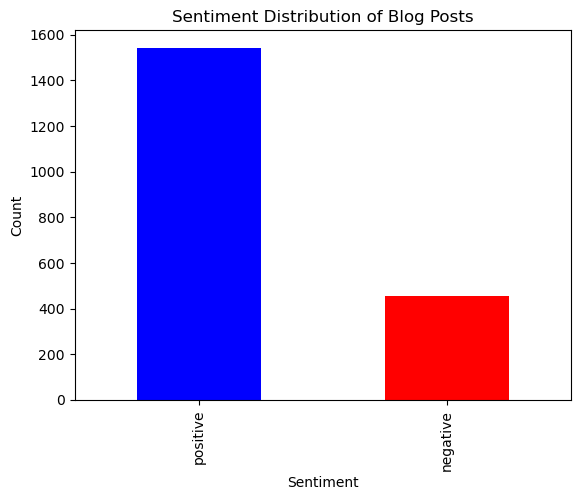

In [12]:
# Distribution of sentiments
sentiment_distribution = df['sentiment'].value_counts()
print(sentiment_distribution)

# Optional: Display as a bar chart
import matplotlib.pyplot as plt

sentiment_distribution.plot(kind='bar', color=['blue', 'red', 'grey'])
plt.title('Sentiment Distribution of Blog Posts')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

Index(['Data', 'Labels', 'sentiment_score', 'sentiment'], dtype='object')
                                                Data sentiment
0  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  negative
1  Newsgroups: alt.atheism\nPath: cantaloupe.srv....  positive
2  Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...  negative
3  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  negative
4  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...  positive
positive    1359
negative     609
neutral       32
Name: sentiment, dtype: int64


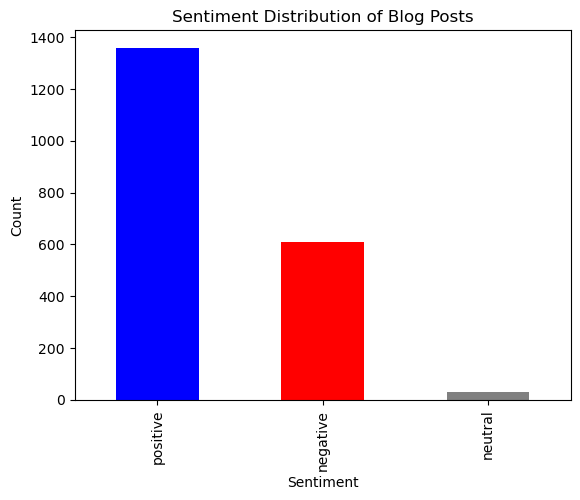

In [13]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import pandas as pd

# Load the dataset
df = pd.read_csv(r"C:\Users\haree\OneDrive\Desktop\blogs.csv")

# Initialize the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Define a function to get sentiment score using VADER
def get_vader_sentiment(text):
    score = analyzer.polarity_scores(text)
    return score['compound']

# Apply the sentiment function to the 'Data' column
df['sentiment_score'] = df['Data'].apply(get_vader_sentiment)
# Categorize sentiments based on the compound score
def categorize_vader_sentiment(score):
    if score > 0.05:
        return 'positive'
    elif score < -0.05:
        return 'negative'
    else:
        return 'neutral'

df['sentiment'] = df['sentiment_score'].apply(categorize_vader_sentiment)

# Verify column names
print(df.columns)

# Display the first few rows with sentiment
print(df[['Data', 'sentiment']].head())

# Distribution of sentiments
sentiment_distribution = df['sentiment'].value_counts()
print(sentiment_distribution)
# Optional: Display as a bar chart
import matplotlib.pyplot as plt

sentiment_distribution.plot(kind='bar', color=['blue', 'red', 'grey'])
plt.title('Sentiment Distribution of Blog Posts')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In [14]:
from sklearn.metrics import classification_report, accuracy_score

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Display classification report
report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)
print(report)

Accuracy: 0.7475
                          precision    recall  f1-score   support

             alt.atheism       0.55      0.94      0.69        18
           comp.graphics       0.82      0.78      0.80        18
 comp.os.ms-windows.misc       1.00      0.82      0.90        22
comp.sys.ibm.pc.hardware       0.89      0.64      0.74        25
   comp.sys.mac.hardware       0.87      0.62      0.72        21
          comp.windows.x       1.00      0.64      0.78        25
            misc.forsale       1.00      0.50      0.67        18
               rec.autos       0.94      0.89      0.91        18
         rec.motorcycles       0.87      0.81      0.84        16
      rec.sport.baseball       0.79      0.83      0.81        18
        rec.sport.hockey       0.83      1.00      0.91        15
               sci.crypt       0.67      0.95      0.78        19
         sci.electronics       0.46      0.81      0.59        16
                 sci.med       0.88      0.82      0.85   

positive    1359
negative     609
neutral       32
Name: sentiment, dtype: int64


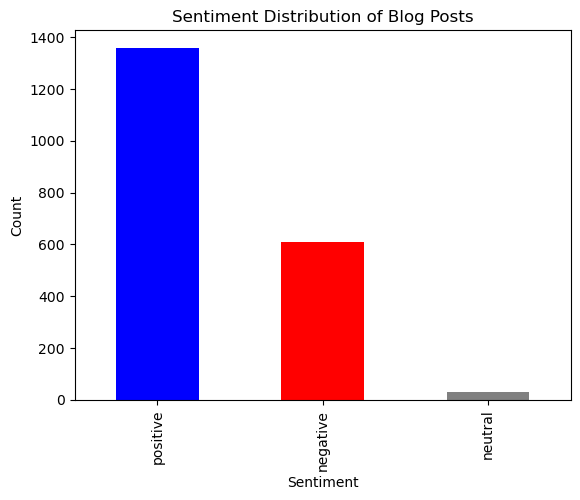

In [15]:
# Display sentiment distribution
sentiment_distribution = df['sentiment'].value_counts()
print(sentiment_distribution)

# Optional: Display as a bar chart
import matplotlib.pyplot as plt

sentiment_distribution.plot(kind='bar', color=['blue', 'red', 'grey'])
plt.title('Sentiment Distribution of Blog Posts')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()